In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('./anomaly_data.csv')
df_test[' timestamp'] = pd.to_datetime(df_test[' timestamp'])
df_test

,cpu_used,memory_used,timestamp
0,44.257902,499971.901834,2023-12-04 22:00:00+00:00
1,57.995132,499804.705626,2023-12-04 22:05:00+00:00
2,57.052537,499968.716084,2023-12-04 22:10:00+00:00
3,46.925357,500108.595365,2023-12-04 22:15:00+00:00
4,52.596490,500080.930637,2023-12-04 22:20:00+00:00
...,...,...,...
995,50.948086,500095.181513,2023-12-08 08:55:00+00:00
996,48.004218,500084.655784,2023-12-08 09:00:00+00:00
997,56.570113,499918.757240,2023-12-08 09:05:00+00:00
998,47.978614,500065.941323,2023-12-08 09:10:00+00:00


In [3]:
cpu_used = df_test[['cpu_used', ' timestamp']]
memory_used = df_test[[' memory_used', ' timestamp']]

In [4]:
def create_lag(df, col, num_lags=1):
    for i in range(1, num_lags+1):
        df['lag_{}'.format(i)] = df[col].shift(i)
      
    df = df.dropna()
    return df

In [5]:
cpu_used = create_lag(cpu_used, 'cpu_used', 2)
memory_used = create_lag(memory_used, ' memory_used', 2)

In [6]:
X_cpu = cpu_used[['cpu_used', 'lag_1', 'lag_2']]
X_memory = memory_used[[' memory_used', 'lag_1', 'lag_2']]

In [ ]:
X_cpu['cpu_used'] = (X_cpu['cpu_used']/100).astype(float)
X_cpu['lag_1'] = (X_cpu['lag_1']/100).astype(float)
X_cpu['lag_2'] = (X_cpu['lag_2']/100).astype(float)

X_memory[' memory_used'] = (X_memory[' memory_used']/1000000).astype(float)
X_memory['lag_1'] = (X_memory['lag_1']/1000000).astype(float)
X_memory['lag_2'] = (X_memory['lag_2']/1000000).astype(float)

In [8]:
model = tf.keras.models.load_model('./modelV2.h5')

In [9]:
cpu_pred = model.predict(X_cpu.to_numpy())
memory_pred = model.predict(X_memory.to_numpy())

32/32 [==============================] - 0s 3ms/step


In [10]:
cpu_used['prediction'] = cpu_pred
cpu_used['prediction'] = cpu_used['prediction'].apply(lambda x: 1 if x > 0.5 else 0)

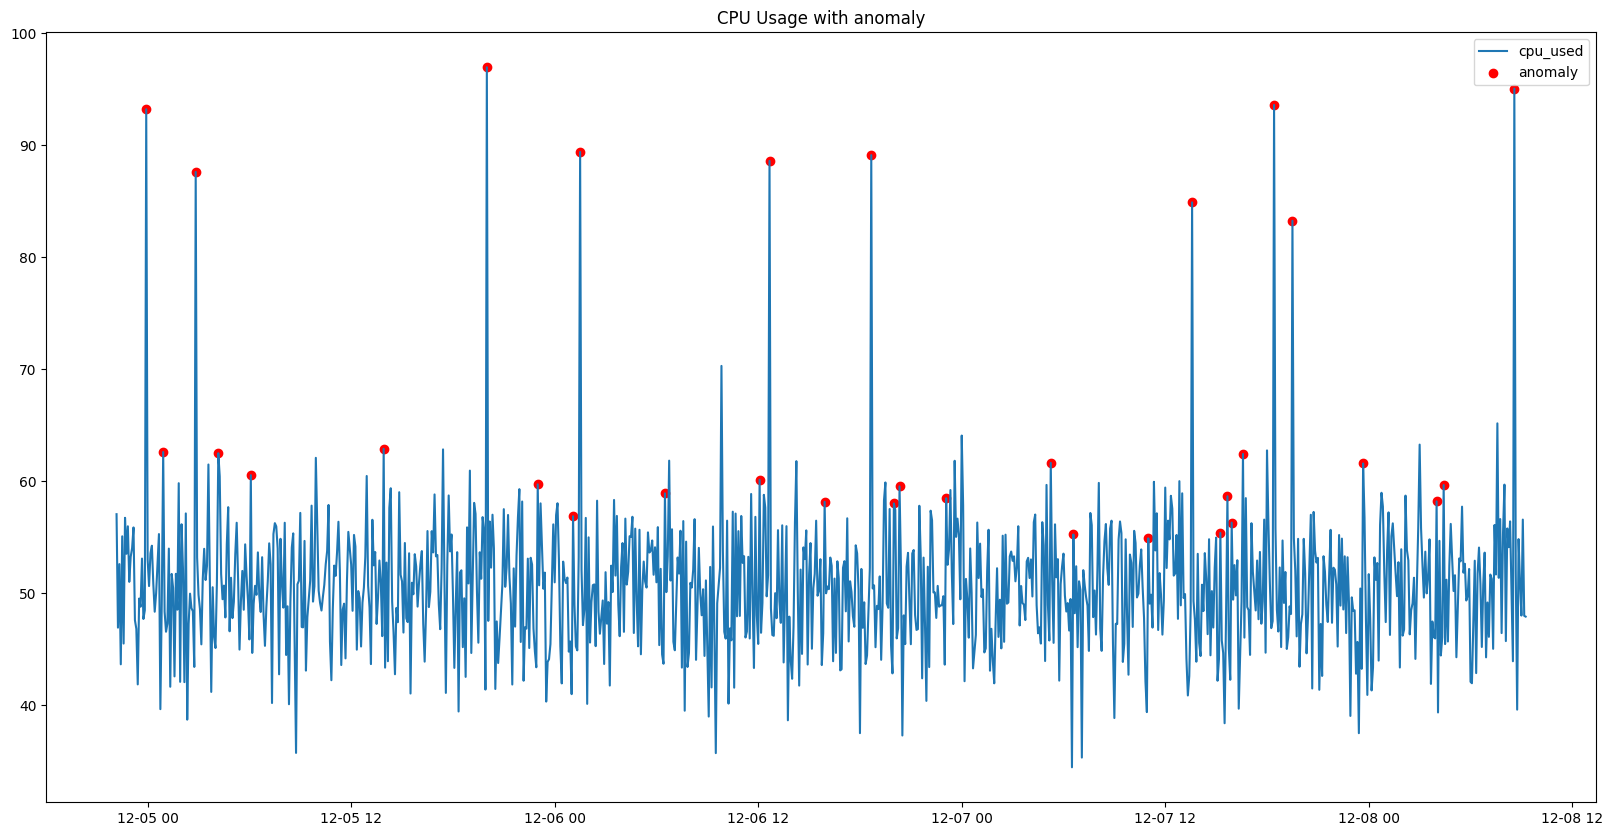

In [11]:
plt.figure(figsize=(20,10))
plt.plot(cpu_used[' timestamp'], cpu_used['cpu_used'], label='cpu_used')
plt.scatter(cpu_used[cpu_used['prediction'] == 1][' timestamp'], cpu_used[cpu_used['prediction'] == 1]['cpu_used'], color='red', label='anomaly')
plt.legend()
plt.title('CPU Usage with anomaly')
plt.show()
